In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('jobs.csv')

In [3]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S


In [4]:
df.tail()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
4995,2020,Machine Learning Engineer (Remote),NaN,NaN,179769,179111,UK,NaN,CT,In-person,IN,NaN
4996,2021,Machine Learning Engineer (Remote),NaN,NaN,184642,196373,CN,NaN,FL,Remote,UK,NaN
4997,2022,Machine Learning Engineer,Analysis,GBP,135319,51366,UK,EN,FL,Hybrid,JP,M
4998,2021,Statistician,Data Science,EUR,58037,181817,US,MI,PT,Remote,DE,S
4999,2020,Data Scientist (Remote),Engineering,GBP,143565,172425,CN,EX,CT,Remote,CN,L


In [5]:
df.isnull().sum()

work_year               0
job_title               0
job_category          500
salary_currency       500
salary                  0
salary_in_usd           0
employee_residence      0
experience_level      500
employment_type         0
work_setting            0
company_location        0
company_size          500
dtype: int64

In [6]:
df.describe()

,work_year,salary,salary_in_usd
count,5000.00000,5000.000000,5000.000000
mean,2020.97680,102046.307200,114076.995800
std,0.81951,70853.626492,49113.807687
min,2020.00000,-198754.000000,30016.000000
25%,2020.00000,64295.500000,71343.750000
50%,2021.00000,110636.000000,114167.000000
75%,2022.00000,153104.750000,156665.750000
max,2022.00000,199924.000000,199985.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


In [8]:
df.columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [9]:
df.shape

(5000, 12)

In [10]:
# Checking for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing Values by Column:")
print(missing_values[missing_values > 0])


Missing Values by Column:
job_category        500
salary_currency     500
experience_level    500
company_size        500
dtype: int64


# Exploratory Data Analysis (EDA)

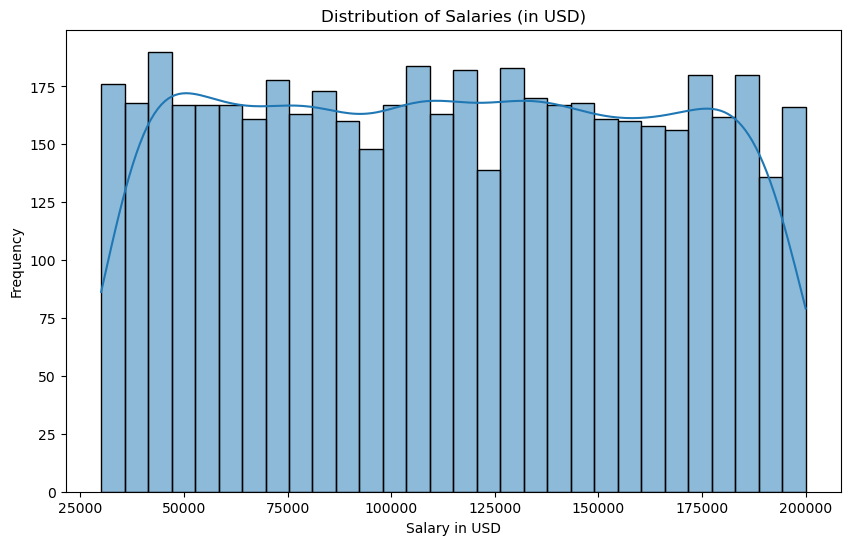

In [11]:
#EDA
# Plotting the distribution of salaries in USD
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution of Salaries (in USD)')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

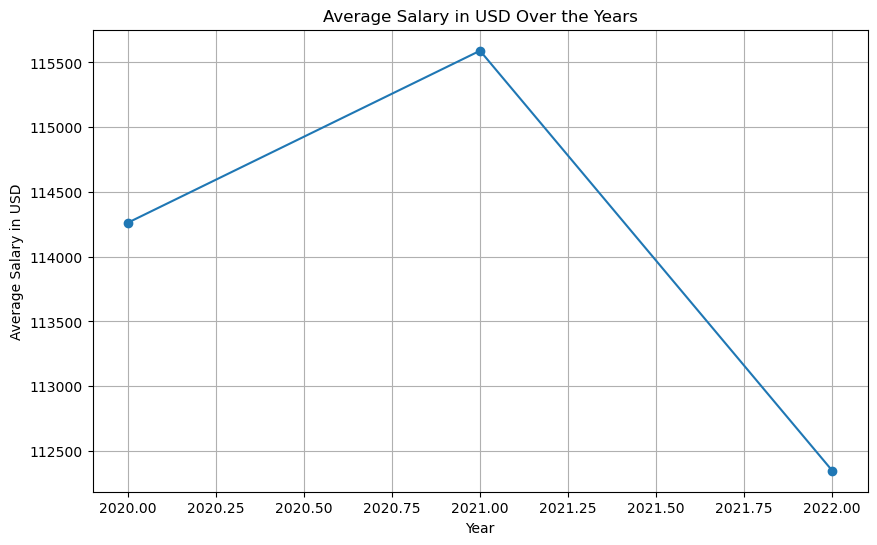

In [12]:
# Plotting average salary by year to see trends over time
avg_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean()

plt.figure(figsize=(10, 6))
plt.plot(avg_salary_by_year, marker='o')
plt.title('Average Salary in USD Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.grid(True)
plt.show()

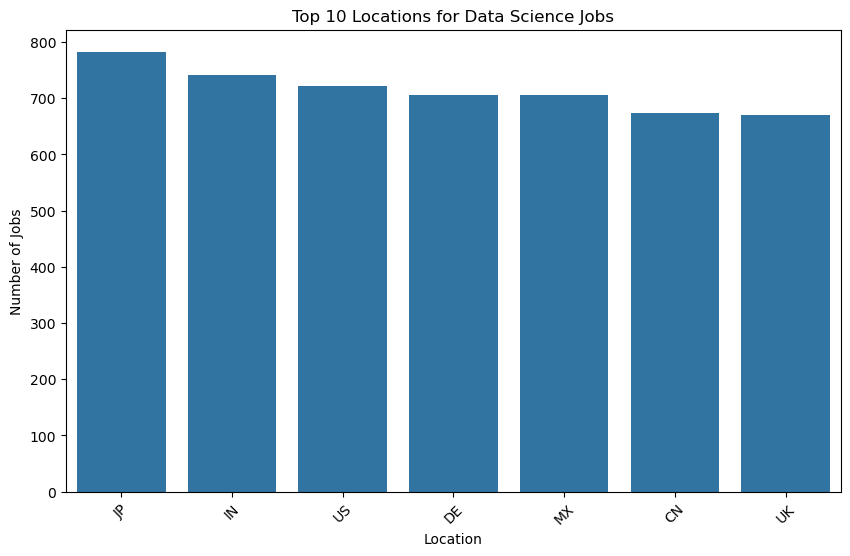

In [13]:
# Counting job listings by employee residence
top_locations = df['employee_residence'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.title('Top 10 Locations for Data Science Jobs')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.show()

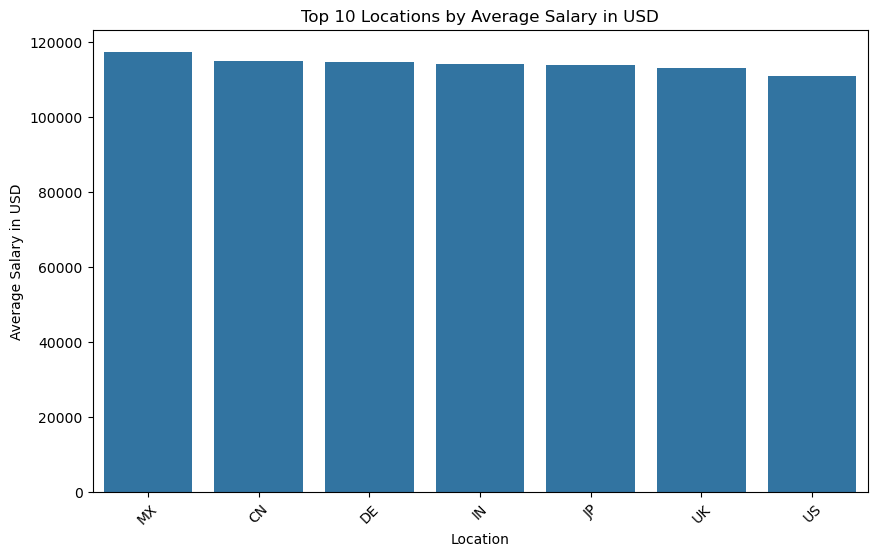

In [14]:
# Calculating average salary in USD by employee residence
avg_salary_by_location = df.groupby('employee_residence')['salary_in_usd'].mean().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_salary_by_location.index, y=avg_salary_by_location.values)
plt.title('Top 10 Locations by Average Salary in USD')
plt.xlabel('Location')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45)
plt.show()

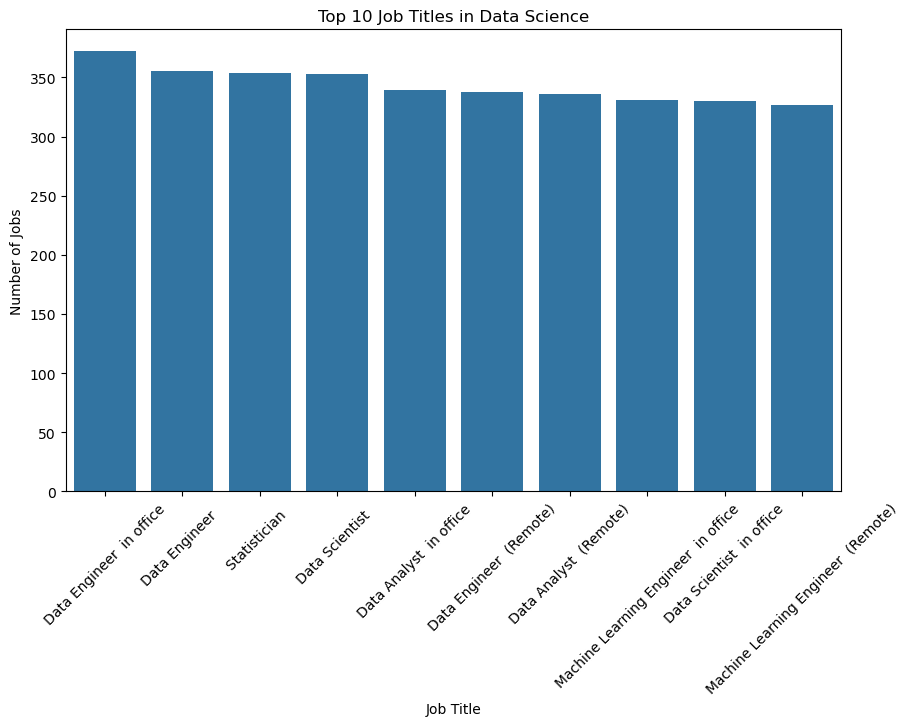

In [15]:
# Counting the most common job titles
top_job_titles = df['job_title'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_job_titles.index, y=top_job_titles.values)
plt.title('Top 10 Job Titles in Data Science')
plt.xlabel('Job Title')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.show()

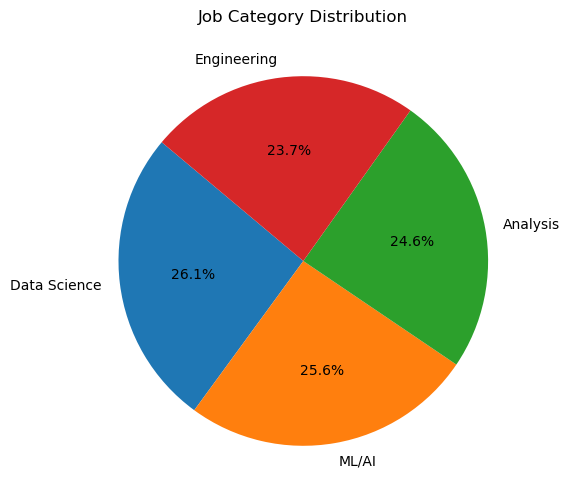

In [16]:
# Counting unique job categories
job_category_counts = df['job_category'].value_counts()

plt.figure(figsize=(10, 6))
job_category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Job Category Distribution')
plt.ylabel('')
plt.show()

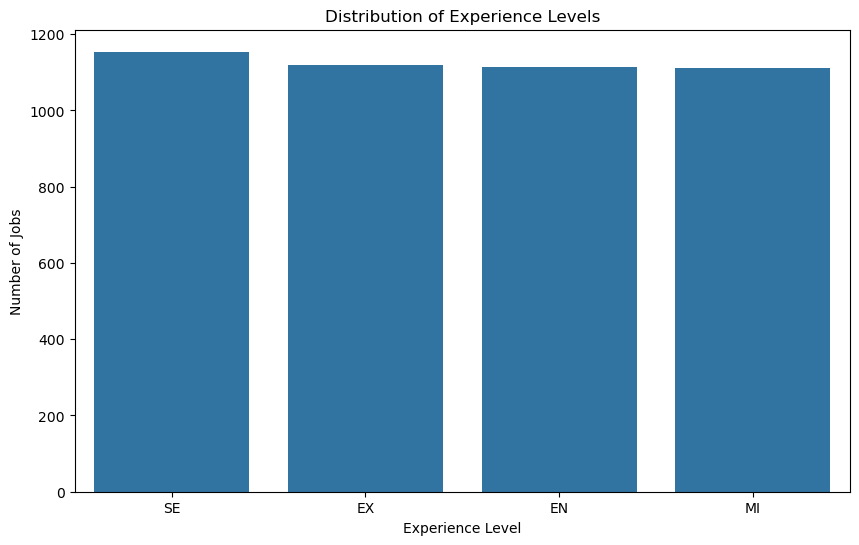

In [17]:
# Counting each experience level
experience_counts = df['experience_level'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=experience_counts.index, y=experience_counts.values)
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Number of Jobs')
plt.show()

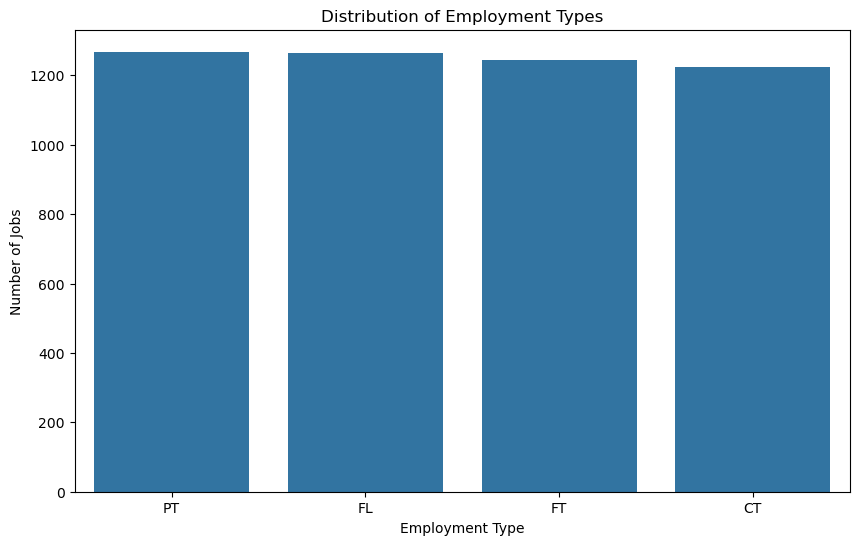

In [18]:
# Counting each employment type
employment_type_counts = df['employment_type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=employment_type_counts.index, y=employment_type_counts.values)
plt.title('Distribution of Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Number of Jobs')
plt.show()

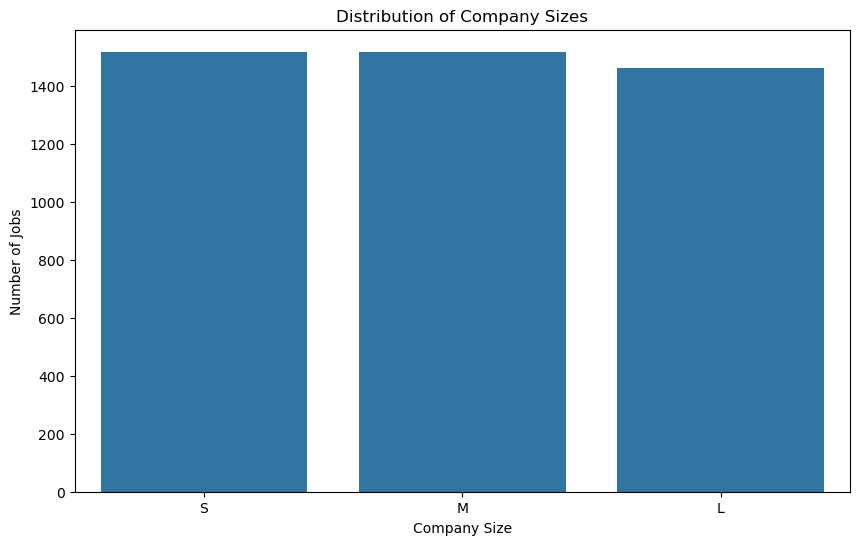

In [19]:
# Counting each company size category
company_size_counts = df['company_size'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=company_size_counts.index, y=company_size_counts.values)
plt.title('Distribution of Company Sizes')
plt.xlabel('Company Size')
plt.ylabel('Number of Jobs')
plt.show()

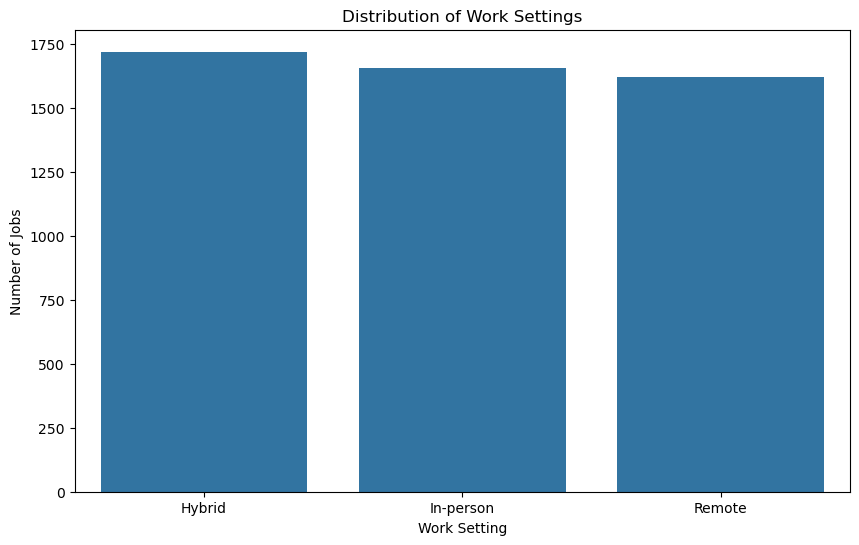

In [20]:
# Counting each work setting
work_setting_counts = df['work_setting'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=work_setting_counts.index, y=work_setting_counts.values)
plt.title('Distribution of Work Settings')
plt.xlabel('Work Setting')
plt.ylabel('Number of Jobs')
plt.show()

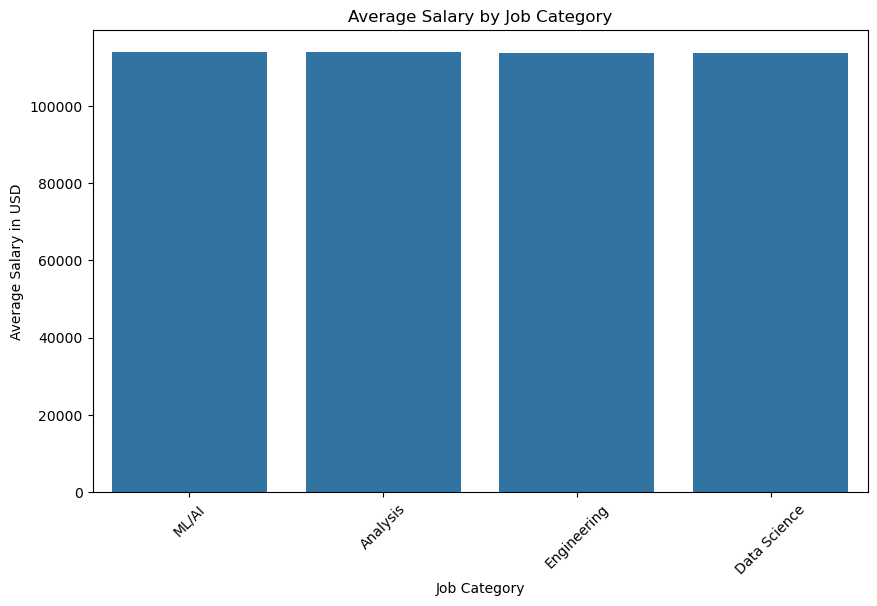

In [21]:
# Calculating average salary by job category
avg_salary_by_job_category = df.groupby('job_category')['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_salary_by_job_category.index, y=avg_salary_by_job_category.values)
plt.title('Average Salary by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45)
plt.show()

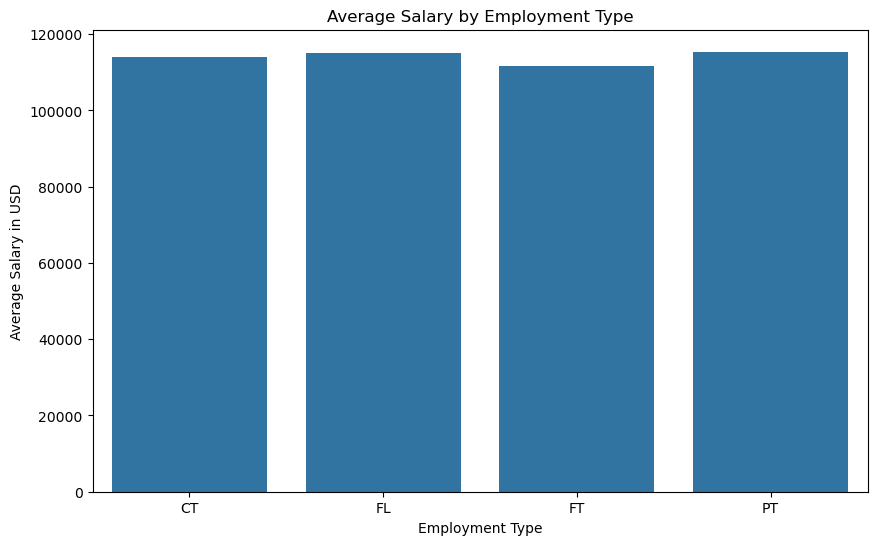

In [22]:
# Calculating average salary by employment type
avg_salary_by_employment = df.groupby('employment_type')['salary_in_usd'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_salary_by_employment.index, y=avg_salary_by_employment.values)
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary in USD')
plt.show()

In [23]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

# Selecting features and target variable
features = ['work_year', 'job_title', 'job_category', 'employee_residence',
            'experience_level', 'employment_type', 'work_setting', 'company_location', 'company_size']
target = 'salary_in_usd'

# Splitting the data into training and testing sets
X = df[features]
y = df[target]

In [24]:
# Identifying numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Defining preprocessing for numerical data: impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Defining preprocessing for categorical data: impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [25]:
# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection And Training

In [26]:
# Importing models and evaluation metrics
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Defining a function to train and evaluate models
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    # Creating a pipeline that includes preprocessing and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    # Training the model
    pipeline.fit(X_train, y_train)
    # Making predictions
    y_pred = pipeline.predict(X_test)
    # Evaluating the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2

# Initializing models
models = {
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'XGBoost Regressor': XGBRegressor(random_state=42)
}
# Training and evaluating each model
results = {}
for model_name, model in models.items():
    mae, rmse, r2 = train_and_evaluate(model, X_train, X_test, y_train, y_test)
    results[model_name] = {'MAE': mae, 'RMSE': rmse, 'R2 Score': r2}

# Displaying the results
results_df = pd.DataFrame(results).T
print("\nModel Performance:")
display(results_df)


Model Performance:


,MAE,RMSE,R2 Score
Gradient Boosting Regressor,42127.661879,49133.985636,-0.031183
Random Forest Regressor,42728.218216,49924.842260,-0.064646
XGBoost Regressor,45787.670027,55296.214688,-0.306059


# Hyperparameter Tuning with Cross-Validation

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Defining the parameter grid for Gradient Boosting Regressor
param_grid = {
    'model__n_estimators': [50, 100, 200, 300],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__max_depth': [3, 5, 7, 9],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Creating the pipeline for preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', GradientBoostingRegressor(random_state=42))])

# Initializing RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline, param_grid, n_iter=50, cv=5, scoring='neg_mean_absolute_error', random_state=42, n_jobs=-1
)

# Fitting the model to the training data
random_search.fit(X_train, y_train)

# Displaying the best parameters and best score
best_params = random_search.best_params_
best_score = -random_search.best_score_
print("Best Parameters:", best_params)
print("Best MAE Score from Cross-Validation:", best_score)

Best Parameters: {'model__n_estimators': 100, 'model__min_samples_split': 5, 'model__min_samples_leaf': 4, 'model__max_depth': 3, 'model__learning_rate': 0.01}
Best MAE Score from Cross-Validation: 42746.36426436503


# Evaluating the Tuned Model on Test Data

In [28]:
# Making predictions on the test set
y_pred = random_search.best_estimator_.predict(X_test)

# Calculating performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Performance of the Tuned Gradient Boosting Regressor:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

Performance of the Tuned Gradient Boosting Regressor:
MAE: 41692.83408551535
RMSE: 48518.3025906492
R2 Score: -0.005502360712994703


E:\sarhan\saji2\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Feature Importance Analysis


Top 10 Features by Importance:


,Feature,Importance
45,company_size_L,0.055865
0,work_year,0.048061
44,company_location_US,0.047476
40,company_location_IN,0.044261
15,job_title_Statistician in office,0.041200
24,employee_residence_MX,0.040037
46,company_size_M,0.038773
38,company_location_CN,0.037103
13,job_title_Statistician,0.037038
25,employee_residence_UK,0.031720


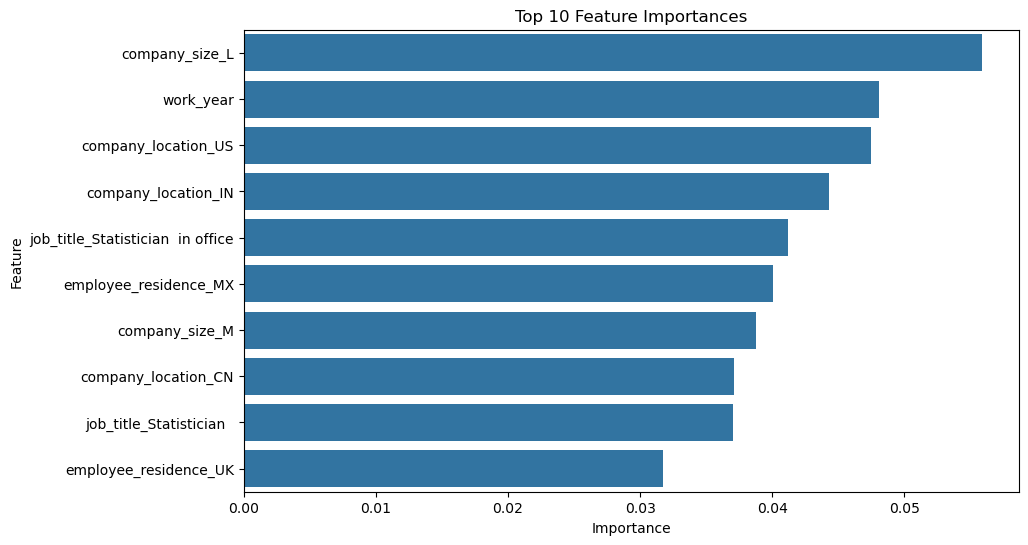

In [29]:
# Extracting feature importances from the best-performing model
best_model = GradientBoostingRegressor(random_state=42)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', best_model)])
pipeline.fit(X_train, y_train)

# Extracting feature importances
feature_importances = pipeline.named_steps['model'].feature_importances_

# Getting feature names after one-hot encoding
encoded_features = list(pipeline.named_steps['preprocessor'].transformers_[1][1]
                        .named_steps['onehot'].get_feature_names_out(categorical_cols))

# Combining numerical and encoded categorical feature names
all_features = list(numerical_cols) + encoded_features

# Creating a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

# Displaying the top 10 features
print("\nTop 10 Features by Importance:")
display(feature_importance_df.head(10))

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()